### Load packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Create dataset

In [9]:
import os

path = "../../test_ml/PROJT/data_1000/train/"
files = os.listdir(path)[:3]
print(files)

classes={'a':0,'b':1,'c':2}
print(classes['c'])

['a', 'b', 'c']
2


In [10]:
import cv2

X = []
Y = []

for cl in classes:
    pth = path+cl
    for img_name in os.listdir(pth):
        img = cv2.imread(pth+"/"+img_name,0)
        X.append(img)
        Y.append(classes[cl])
print("dataset created successfully!")

dataset created successfully!


In [11]:
pd.Series(Y).value_counts()

1    1000
2    1000
0    1000
dtype: int64

In [12]:
X[0].shape

(28, 28)

In [13]:
print(type(X))
X = np.array(X)
Y = np.array(Y)
print(type(X))

<class 'list'>
<class 'numpy.ndarray'>


### Analyze data

1


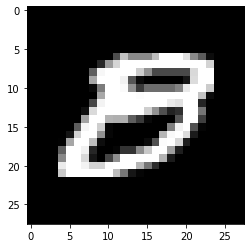

In [19]:
plt.imshow(X[1000],cmap="gray")
print(Y[1000])

In [20]:
X.shape

(3000, 28, 28)

### Prepare data

In [21]:
X_new = X.reshape(len(X),-1)
print(X_new.shape)
print(Y.shape)

(3000, 784)
(3000,)


In [22]:
28*28

784

In [23]:
print(X.shape)
print(X.ndim)
print(X_new.ndim)

(3000, 28, 28)
3
2


### Split data

In [24]:
xtrain, xtest, ytrain, ytest = train_test_split(X_new,Y, 
                                                test_size=.20, random_state=10)

In [25]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(2400, 784) (2400,)
(600, 784) (600,)


### Feature Scaling

In [26]:
print(xtrain.max())
print(xtest.max())
x_train = xtrain/255
x_test = xtest/255
print(x_train.max())
print(x_test.max())

255
255
1.0
1.0


### FEature Selection: PCA

In [27]:
from sklearn.decomposition import PCA

In [28]:
print(x_train.shape, x_test.shape)
pca = PCA(.98)
xtrain = pca.fit_transform(x_train)
xtest = pca.transform(x_test)
print(xtrain.shape, xtest.shape)
print(pca.n_components)
print(pca.n_features_)

(2400, 784) (600, 784)
(2400, 178) (600, 178)
0.98
784


In [29]:
ytest[:10]

array([1, 0, 1, 1, 0, 1, 2, 1, 2, 2])

### Train Model

In [30]:
log = LogisticRegression()
log.fit(xtrain, ytrain)

LogisticRegression()

### Prediction

In [31]:
tr_pred = log.predict(xtrain)
ts_pred = log.predict(xtest)

### Evaluation

In [32]:
print("Training Score", accuracy_score(ytrain,tr_pred))
print("Testing Score", accuracy_score(ytest,ts_pred))

Training Score 1.0
Testing Score 0.99


1


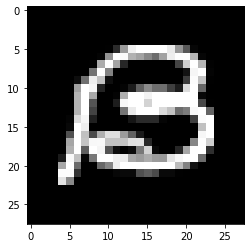

In [33]:
plt.imshow(x_test[0].reshape(28,28), cmap='gray')
print(ytest[0])

### Test Model

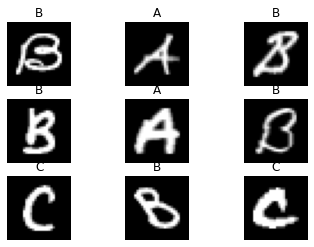

In [34]:
decode = {0:'A',1:'B',2:'C'}
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i].reshape(28,28),cmap='gray')
    plt.title(decode[ts_pred[i]])
    plt.axis('off')

In [35]:
np.where(ts_pred!=ytest)
d = pd.DataFrame({'Actual':ytest,'Prediction':ts_pred})
d[d['Actual']!=d['Prediction']]

Actual  Prediction
55        1           2
197       0           1
237       1           2
390       1           0
507       1           0
578       0           1

### Test model on real data

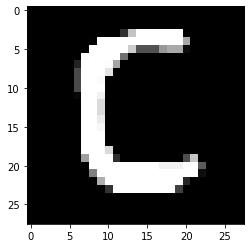

In [46]:
img = cv2.resize(cv2.imread('t.png',0), (28,28))
plt.imshow(img,cmap='gray')

In [47]:
img = pca.transform(img.reshape(1,-1)/255)

In [48]:
decode[log.predict(img)[0]]

'C'